In [319]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

# Audi cars price regressor

In [320]:
#uploding Audu data  
audi=pd.read_csv('./audi.csv') 

In [321]:
audi.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [322]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [323]:
audi.shape

(10668, 9)

In [324]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


## An explanation of each feature
* model	- What is the car model
* year - What is the year of manufacture of the vehicle
* price	- What is the price of the car
* transmission - Manual, Automatic or Semi-Auto vehicle 
* mileage - How many miles does the car have
* fuelType	- What type of fuel tank: Petrol or Diesel
* tax - Vehicle tax	
* mpg - Average fuel consumption of the vehicle	
* engineSize - Engine volume of the vehicle

In [325]:
#cheching if ther if Nulls data to full
audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Text(0.5, 1.0, 'Price Correlation between different fearures')

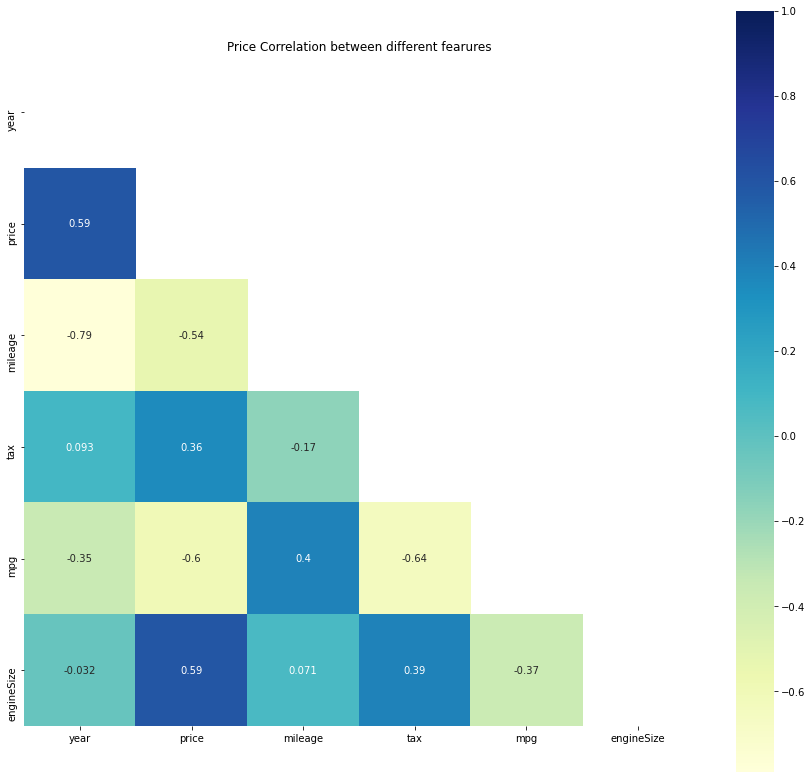

In [326]:
corr = audi.corr()
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap="YlGnBu" ,mask=mask.T)
plt.title('Price Correlation between different fearures')

[Text(0, 0, ' A1'),
 Text(0, 0, ' A6'),
 Text(0, 0, ' A4'),
 Text(0, 0, ' A3'),
 Text(0, 0, ' Q3'),
 Text(0, 0, ' Q5'),
 Text(0, 0, ' A5'),
 Text(0, 0, ' S4'),
 Text(0, 0, ' Q2'),
 Text(0, 0, ' A7'),
 Text(0, 0, ' TT'),
 Text(0, 0, ' Q7'),
 Text(0, 0, ' RS6'),
 Text(0, 0, ' RS3'),
 Text(0, 0, ' A8'),
 Text(0, 0, ' Q8'),
 Text(0, 0, ' RS4'),
 Text(0, 0, ' RS5'),
 Text(0, 0, ' R8'),
 Text(0, 0, ' SQ5'),
 Text(0, 0, ' S8'),
 Text(0, 0, ' SQ7'),
 Text(0, 0, ' S3'),
 Text(0, 0, ' S5'),
 Text(0, 0, ' A2'),
 Text(0, 0, ' RS7')]

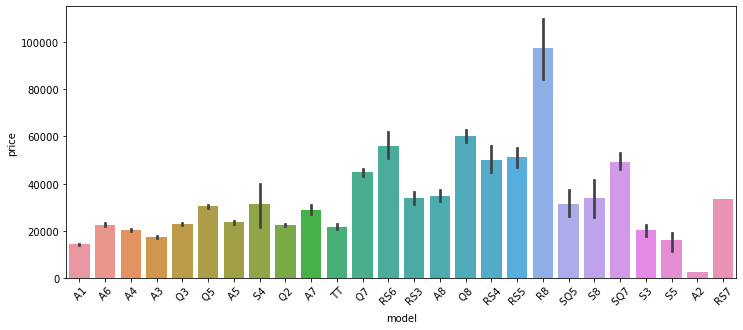

In [327]:

plt.figure(figsize=(12,5))
bar = sns.barplot(data=audi, x='model', y='price')
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)

#### We can see that significantly the highest price is of R8  and the lowest is of A2

[Text(0.5, 1.0, 'Year vs. Price')]

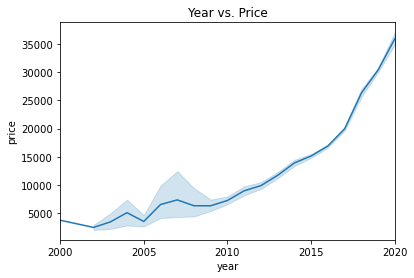

In [328]:
# Audi : Year vs. Price
line = sns.lineplot(data=audi, x='year', y='price')
line.set(xlim=(2000,2020))
line.set_xticks(range(2000,2021,5))
line.set(title='Year vs. Price')

#### We can see that the newer the vehicle, the higher the price

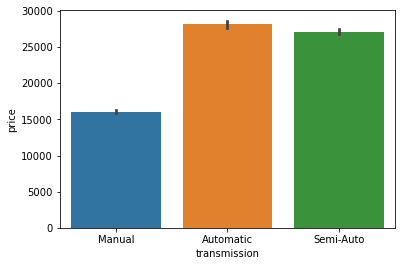

In [329]:
sns.barplot(data=audi, x='transmission', y='price')
plt.savefig('audi_trans_price.png')

#### The prices of manual vehicles are significantly cheaper than the price of automatic or semi-automatic vehicles

Text(0.5, 1.0, 'Mileage vs. Price')

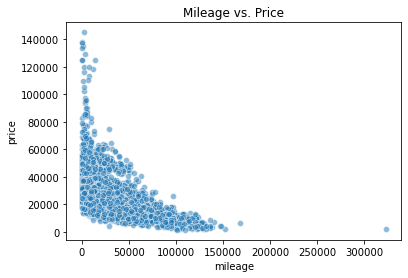

In [330]:
# Mileage vs. Price
sns.scatterplot(data=audi, x='mileage', y='price', alpha=0.5)
plt.savefig('audi_mile_price.png')
ax = plt.gca()
ax.set_title("Mileage vs. Price")

#### Downward trend- The higher the kilometers, the lower the price - you can see the opposite here

Text(0.5, 1.0, 'Mileage vs. Price')

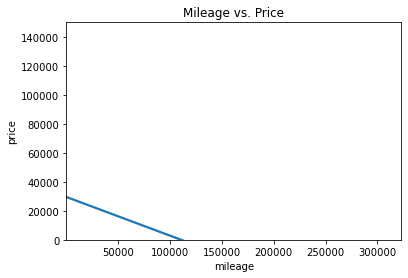

In [331]:
#now we will see it clearly: Mileage vs. Price
(sns.regplot(data=audi, x='mileage', y='price', scatter=False)).set(ylim=(0,150000))
plt.savefig('audi_mile_price_reg.png')
ax = plt.gca()
ax.set_title("Mileage vs. Price")

Text(0.5, 1.0, 'MPG vs. Price')

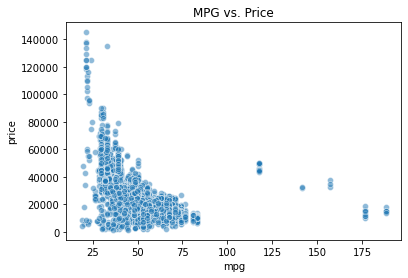

In [332]:
# MPG vs. Price
sns.scatterplot(data=audi, x='mpg', y='price', alpha=0.5)
ax = plt.gca()
ax.set_title("MPG vs. Price")

#### Downward trend- The higher the mpg, the lower the price - you can see the opposite here
(MPG= miles per gallon, and is used to show how far your car is able to travel for every gallon )

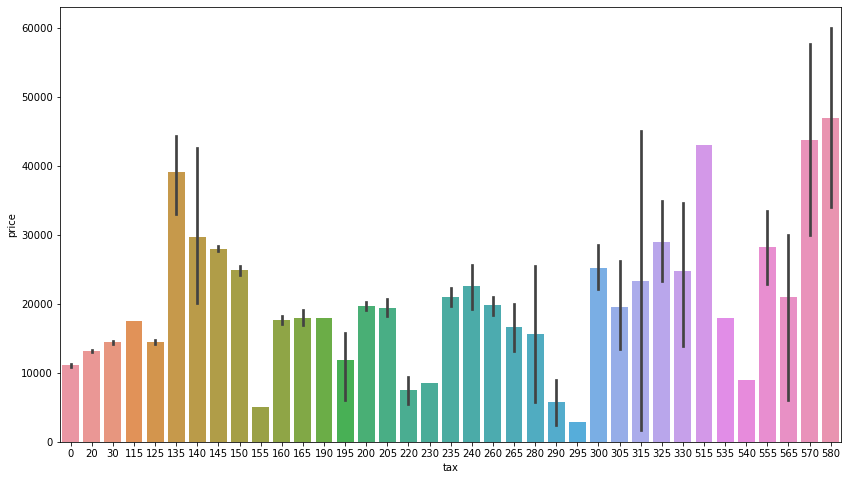

In [333]:
plt.figure(figsize=(14,8))
sns.barplot(data=audi, x='tax', y='price',)
plt.savefig('audi_tax_price.png')

### We can see that  there is no coreletion between the tax to the price

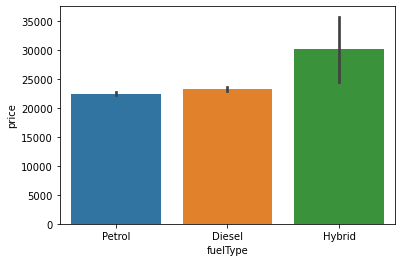

In [334]:
# Fuel Type vs. Price
sns.barplot(data=audi, x='fuelType', y='price')
plt.savefig('audi_fuel_price.png')

# Modeling

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

### Preposesing

In [279]:
audi_target = audi.price
audi_data = audi.drop(['price'], axis=1)#Price is the purpose of the prediction
audi_data = audi.drop(['tax'], axis=1) #We have already seen that there is a low correlation between the tax and the price
X_train, X_test, y_train, y_test = train_test_split(audi_data, audi_target,train_size=0.8, test_size=0.2,random_state=0)

In [308]:
#Checking which columns have non-numeric data
object_cols = [col for col in audi_data.columns if audi_data[col].dtype == 'object']
print(object_cols)

['model', 'transmission', 'fuelType']


In [281]:
from sklearn.preprocessing import LabelEncoder #converting each value in a column to a number
label_encoder = LabelEncoder();
#Training encoder for the diffrent car models (and transform to numeric value)
X_train['model'] = label_encoder.fit_transform(X_train['model']);
#Encoding the car models in the test data also
X_test['model'] = label_encoder.transform(X_test['model']);

#Do the same for transmission and fuelType
X_train['transmission'] = label_encoder.fit_transform(X_train['transmission']);
X_test['transmission'] = label_encoder.transform(X_test['transmission']);

X_train['fuelType'] = label_encoder.fit_transform(X_train['fuelType']);
X_test['fuelType'] = label_encoder.transform(X_test['fuelType']);


<ipython-input-281-b38232f7e549>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['model'] = label_encoder.fit_transform(X_train['model']);
<ipython-input-281-b38232f7e549>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['model'] = label_encoder.transform(X_test['model']);
<ipython-input-281-b38232f7e549>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [282]:
X_train.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
4929,0,2017,14490,1,19229,2,56.5,1.4
9420,8,2019,28490,0,6826,2,33.2,2.0
8756,0,2014,11400,2,18954,2,53.3,1.4
9758,25,2014,19995,1,27400,2,35.8,2.0
9341,2,2019,25490,0,750,0,52.3,1.6


In [283]:
X_test.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
2049,3,2015,14998,1,54654,0,55.4,2.0
5609,3,2019,21950,1,7975,2,39.2,2.0
7638,4,2019,28990,0,3731,2,39.8,2.0
1603,2,2018,25489,2,18478,2,43.5,2.0
5953,2,2019,30950,2,6207,2,34.5,2.0


In [284]:
from sklearn.preprocessing import StandardScaler
#(value-mean)/(standard diviation)
col_names =X_train.columns
features = X_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train[col_names] = features

features2=X_test[col_names]
features2 = scaler.transform(features2.values)
X_test[col_names] = features2


<ipython-input-284-69656501ded0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col_names] = features
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-284-69656501ded0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [285]:
X_test.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
2049,-0.543011,-0.971095,-0.672334,-0.111185,1.270029,-0.953787,0.349775,0.118336
5609,-0.543011,0.876486,-0.078761,-0.111185,-0.713568,1.051292,-0.886843,0.118336
7638,-0.348123,0.876486,0.522325,-1.421755,-0.893914,1.051292,-0.841042,0.118336
1603,-0.737900,0.414591,0.223404,1.199385,-0.267249,1.051292,-0.558605,0.118336
5953,-0.737900,0.876486,0.689673,1.199385,-0.788698,1.051292,-1.245615,0.118336


### Model selection
Our goal is to train the model so that it can predict the price of an Audi car,
For this we will use two models: KNN regressor and Linear-Regression.

#### Linear Regression

In [286]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train Score: ", lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))

Train Score:  1.0
Test Score:  1.0


### We can see that this model is very successful and has 100% success!

#### KNN

In [287]:
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))
print('R-squared train score: {:.3f}'
     .format(knnreg.score(X_train, y_train)))

[14396.6 22201.6 28937.  ... 46201.4 30766.   8739.4]
R-squared test score: 0.987
R-squared train score: 0.992


### We can see that also this model is very successful and has 98% success

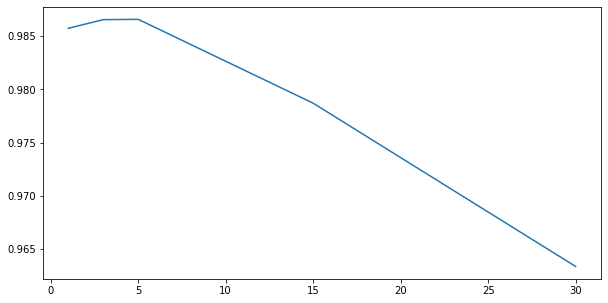

In [317]:
#Optimization test for change in neighbors
neighbors=[1,3,5,15,30]
train_scores=[0.0,0.0,0.0,0.0,0.0]
test_scores=[0.0,0.0,0.0,0.0,0.0]
for k in range(1,6):
    knnreg = KNeighborsRegressor(n_neighbors=neighbors[k-1]).fit(X_train, y_train)   
    test_scores[k-1]=knnreg.score(X_test, y_test)
plt.figure(figsize=(10,5))
plt.plot(neighbors,test_scores)

#### It can be seen that the model well predicts vehicle prices, The number of neighbors that gives the best results is between K=2 to K=5. A straight line can be seen in the graph in this range.